# Pynbody analysis on run741CU data

A quick exploratory analysis of rn741CU dataset obtained from Vistor. 
Dataset URL https://checkpoint.url-protection.com/v1/url?o=http%3A//www.star.uclan.ac.uk/~vpd/4stefan.tar&g=MzEwMDg0NmNkODNjZGNhZg==&h=ZWNkMjFiZTZkOTY4NzJhY2Q5MDYwMWM2ZjAyMjE1YzVlODE4NmM5MGUyMzNhMDMxM2I3MmRlZjRhNGJkNGNlMw==&p=Y3AxZTp1Y2xhbmxpdmU6YzpvOjllYjJkY2RlMDRmZTYyNWExZjE0YmJhOWRhY2VlMjk2OnYxOmg6VA==

In [1]:
%matplotlib inline
from matplotlib.pylab import *

rcParams['figure.figsize'] = (10,6)
rcParams['font.size'] = 18

## Basic data loading/exploration

Loading a simulation output using the `pynbody.load()` function, which tries to automatically determine which type of code output you have:

In [2]:
import pynbody as pb

s = pb.load('/home/ubuntu/projects/S2B/pynbody/run741CU/run741CU.00500.gz')

/home/ubuntu/.local/lib/python3.10/site-packages/pynbody/snapshot/tipsy.py:124: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  warnings.warn(


Note that the above assumes you have downloaded and unpacked the test data in the above folder.

In [3]:
s

<SimSnap "/home/ubuntu/projects/S2B/pynbody/run741CU/run741CU.00500" len=10000000>

In [4]:
len(s)

10000000

In [5]:
len(s.stars)

6000000

`stars`, `gas`, `dark` also available as `s`, `g`, `d`

In [6]:
len(s.star), len(s.gas), len(s.dark)

(6000000, 0, 4000000)

The `properties` attribute of a `SimSnap` tells us some more basic info 

In [7]:
s.properties

{'time': Unit("2.50e-05 kpc**3/2 G**-1/2 Msol**-1/2")}

In [8]:
s.properties['time'].in_units('Myr')

11.786978152775673

Which quantities do we have available?

In [9]:
s.keys()

[]

None! Because pynbody "lazy-loads" data... so lets see which data is actually on-disk:

In [10]:
s.loadable_keys()

['mass', 'eps', 'phi', 'pos', 'vel']

vel - velocity components vx, vy, vz - **km/s ?**, 
**phi - ?**, 
**eps - ?**, 
pos - position components x, y, z - kpc, 
mass - particle mass, **units?**

## Accessing data

To access any of these arrays or vectors, you access them like a python dictionary: 

In [11]:
s.star['pos'].in_units('kpc')

SimArray([[ 0.35583305,  4.08547497, -0.37093452],
          [ 0.48441628, -0.54632998,  0.23705608],
          [ 0.10476512, -3.03144145,  0.12226705],
          ...,
          [ 1.75160432,  6.71199369,  0.15174362],
          [-9.37289429, 10.85958004, -0.44605705],
          [10.69618893, -4.75199938, -0.03752042]], 'kpc')

Note that each array has units attached...

In [12]:
s.star['vel'].in_units('km s**-1')

SimArray([[-22552.89859887, -23120.33491637,  -4764.34188211],
          [-13052.90714171,   8353.56025361,  19388.34132433],
          [ 26581.46718044,   1990.73143281,  12483.56496579],
          ...,
          [-21397.57971844,  11951.51875422,  -3064.73586252],
          [-35907.59751321, -28597.37014551,  -1970.06149227],
          [  9595.02330218,  39703.80801218,   -861.56163811]], 'km s**-1')

**Are those feasible velocity components, like 39703 km/s ?**

By default everything is in system units, but most of the time thinking in physical units is easier: But aparently there is no physical units defined in this dataset.

In [13]:
s.physical_units()

We have defined many useful quantities that are automatically calculated for you. For example, the radial and tangential velocities are simply obtained by

In [14]:
s.star['vt'],s.star['vr']

(SimArray([21624.71251085, 23429.01890165, 29428.80253425, ...,
           23936.74338035, 45907.93095353, 40189.52371876], 'km s**-1'),
 SimArray([-24459.22901991,  -8194.46193325,   -567.78936031, ...,
             6092.63002241,   1873.00727692,  -7348.55867184], 'km s**-1'))

You can get a list of all available derivable quantities 

In [15]:
s.derivable_keys()[0:10]

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe']

## Rendering simple images

We render some simple images with pynbody image function, faceon, edgeon.

SimArray([[9.1014500e-26, 8.9124846e-26, 8.7235191e-26, ...,
           2.0896215e-25, 2.0582903e-25, 2.0269591e-25],
          [9.1742644e-26, 8.9832374e-26, 8.7922104e-26, ...,
           2.1289243e-25, 2.0960091e-25, 2.0630938e-25],
          [9.2470793e-26, 9.0539896e-26, 8.8609005e-26, ...,
           2.1682273e-25, 2.1337280e-25, 2.0992289e-25],
          ...,
          [3.3742502e-26, 3.3313627e-26, 3.2884745e-26, ...,
           1.4833187e-25, 1.4220323e-25, 1.3607459e-25],
          [3.2870977e-26, 3.2337735e-26, 3.1804496e-26, ...,
           1.4499340e-25, 1.3885378e-25, 1.3271413e-25],
          [3.1999452e-26, 3.1361849e-26, 3.0724246e-26, ...,
           1.4165490e-25, 1.3550429e-25, 1.2935366e-25]], dtype=float32, 'g cm**-3')

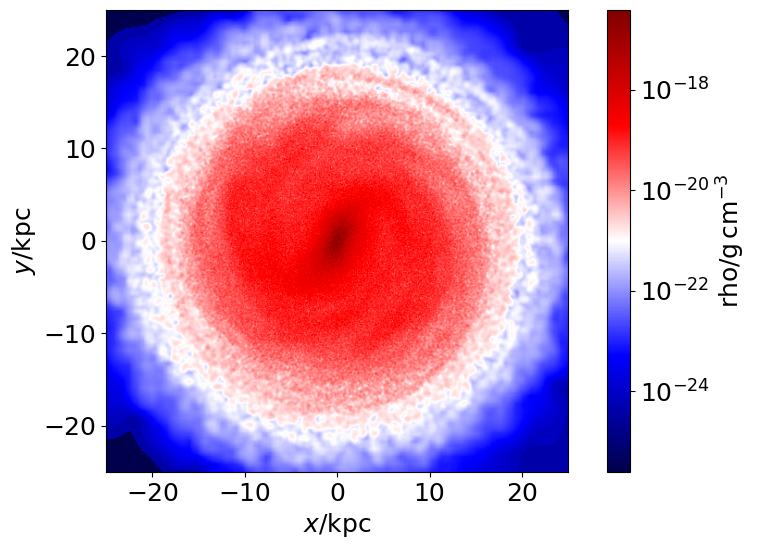

In [16]:
import pynbody.plot.sph as sph

pb.analysis.angmom.faceon(s)
sph.image(s.star,qty="rho",units='g cm^-3',width=50,cmap='seismic')

We see that the bar is almost aligned with the line of sight for edge-on.
Let us rotate 90 clockwise around Z axis.

SimArray([[3.1999452e-26, 3.2870977e-26, 3.3742502e-26, ...,
           9.2468537e-26, 9.1741516e-26, 9.1014500e-26],
          [3.1361849e-26, 3.2337735e-26, 3.3313627e-26, ...,
           9.0537726e-26, 8.9831289e-26, 8.9124846e-26],
          [3.0724246e-26, 3.1804496e-26, 3.2884745e-26, ...,
           8.8606915e-26, 8.7921056e-26, 8.7235191e-26],
          ...,
          [1.4165490e-25, 1.4499340e-25, 1.4833187e-25, ...,
           2.1682273e-25, 2.1289243e-25, 2.0896215e-25],
          [1.3550429e-25, 1.3885378e-25, 1.4220323e-25, ...,
           2.1337280e-25, 2.0960091e-25, 2.0582903e-25],
          [1.2935366e-25, 1.3271413e-25, 1.3607459e-25, ...,
           2.0992289e-25, 2.0630938e-25, 2.0269591e-25]], dtype=float32, 'g cm**-3')

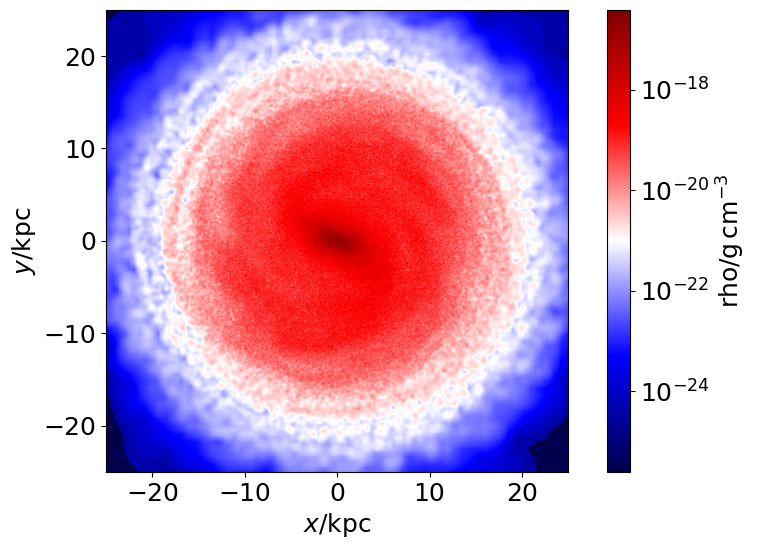

In [17]:
s.rotate_z(90)
sph.image(s.star,qty="rho",units='g cm^-3',width=50,cmap='seismic')

Let us rotate 90 clockwise around X axis to get an edge-on view.

SimArray([[9.2174622e-27, 9.1176043e-27, 9.0177479e-27, ...,
           5.6114923e-27, 5.6114996e-27, 5.6115074e-27],
          [9.2696942e-27, 9.1676130e-27, 9.0655325e-27, ...,
           5.6484848e-27, 5.6484933e-27, 5.6485018e-27],
          [9.3219269e-27, 9.2176224e-27, 9.1133187e-27, ...,
           5.6854773e-27, 5.6854866e-27, 5.6854962e-27],
          ...,
          [2.4722086e-27, 2.5524669e-27, 2.6327250e-27, ...,
           1.8975850e-28, 1.9419793e-28, 1.9863736e-28],
          [2.3326351e-27, 2.4107585e-27, 2.4888818e-27, ...,
           1.8021833e-28, 1.8433043e-28, 1.8844256e-28],
          [2.1930616e-27, 2.2690500e-27, 2.3450383e-27, ...,
           1.7067816e-28, 1.7446295e-28, 1.7824774e-28]], dtype=float32, 'g cm**-3')

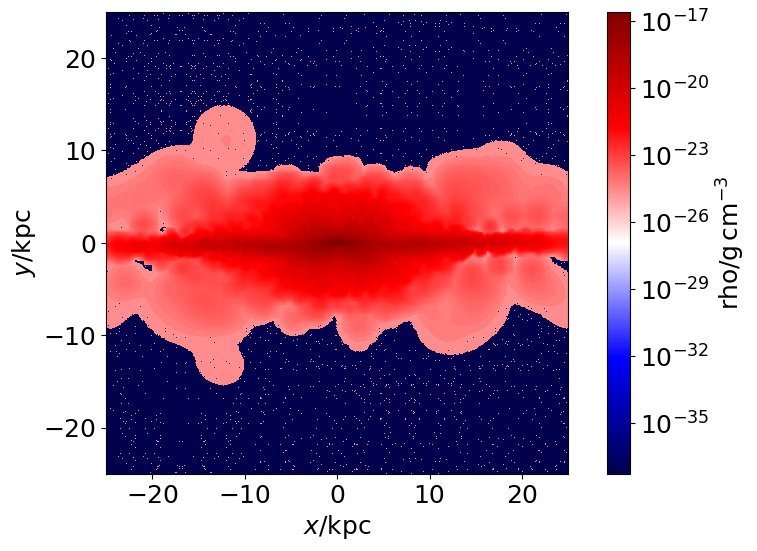

In [18]:
s.rotate_x(90)
sph.image(s.star,qty="rho",units='g cm^-3',width=50,cmap='seismic')

Now we try binned 2d-statistics, same as with R1 model.

In [19]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("pdm", "/home/ubuntu/projects/S2B/pynbody/pdm.py")
pdm = importlib.util.module_from_spec(spec)
sys.modules["pdm"] = pdm
spec.loader.exec_module(pdm)

cmap = 'seismic'
density = {}
t_unit = 'Myr'
d_unit = 'kpc'
v_unit = 'km s**-1'
ro_unit = 'g cm**-3'

# We reload the data to drop effects of prevous manipulations.

s = pb.load('/home/ubuntu/projects/S2B/pynbody/run741CU/run741CU.00500.gz')

x = s.s['pos'][:,0].in_units(d_unit)
y = s.s['pos'][:,1].in_units(d_unit)
z = s.s['pos'][:,2].in_units(d_unit)
vx = s.s['vel'][:,0].in_units(v_unit)
vy = s.s['vel'][:,1].in_units(v_unit)
vz = s.s['vel'][:,2].in_units(v_unit)

print('x', x)
print('y', y)
print('z', z)
print()

print('vx', vx)
print('vy', vy)
print('vz', vz)
print()


/home/ubuntu/.local/lib/python3.10/site-packages/pynbody/snapshot/tipsy.py:124: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  warnings.warn(


x [ 0.35583305  0.48441628  0.10476512 ...  1.75160432 -9.37289429
 10.69618893]
y [ 4.08547497 -0.54632998 -3.03144145 ...  6.71199369 10.85958004
 -4.75199938]
z [-0.37093452  0.23705608  0.12226705 ...  0.15174362 -0.44605705
 -0.03752042]

vx [-22552.89859887 -13052.90714171  26581.46718044 ... -21397.57971844
 -35907.59751321   9595.02330218]
vy [-23120.33491637   8353.56025361   1990.73143281 ...  11951.51875422
 -28597.37014551  39703.80801218]
vz [-4764.34188211 19388.34132433 12483.56496579 ... -3064.73586252
 -1970.06149227  -861.56163811]



Let us calculate the binned 2d stats **the same way we did with R1 model** and plot face-on view.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:00.817031



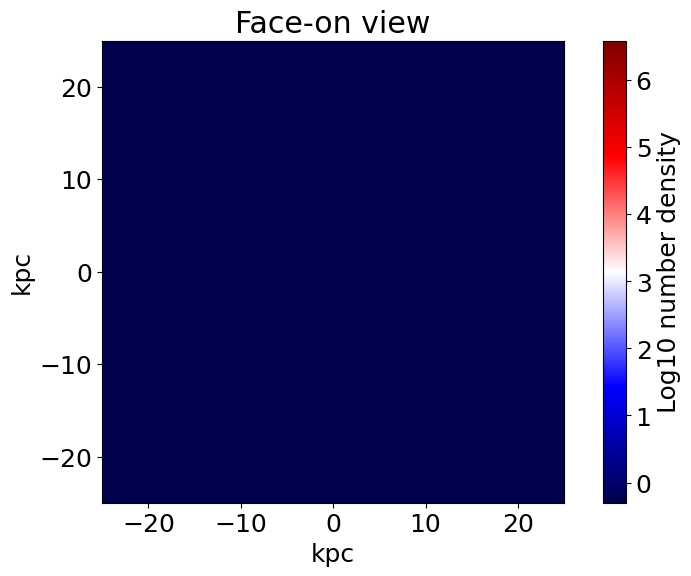

<Figure size 1000x600 with 0 Axes>

In [20]:
density_title = 'Face-on view'
density_cbar_label = 'Log10 number density'

pdm.RenderDensity(x,y,vz,density_title,density_cbar_label)


Let us rotate to 90 degree around X axis for edge-on view, calculate the binned 2d stats and plot.

x [ 0.35583305  0.48441628  0.10476512 ...  1.75160432 -9.37289429
 10.69618893]
y [ 0.37093452 -0.23705608 -0.12226705 ... -0.15174362  0.44605705
  0.03752042]
z [ 4.08547497 -0.54632998 -3.03144145 ...  6.71199369 10.85958004
 -4.75199938]

vx [-22552.89859887 -13052.90714171  26581.46718044 ... -21397.57971844
 -35907.59751321   9595.02330218]
vy [  4764.34188211 -19388.34132433 -12483.56496579 ...   3064.73586252
   1970.06149227    861.56163811]
vz [-23120.33491637   8353.56025361   1990.73143281 ...  11951.51875422
 -28597.37014551  39703.80801218]

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:00.676042



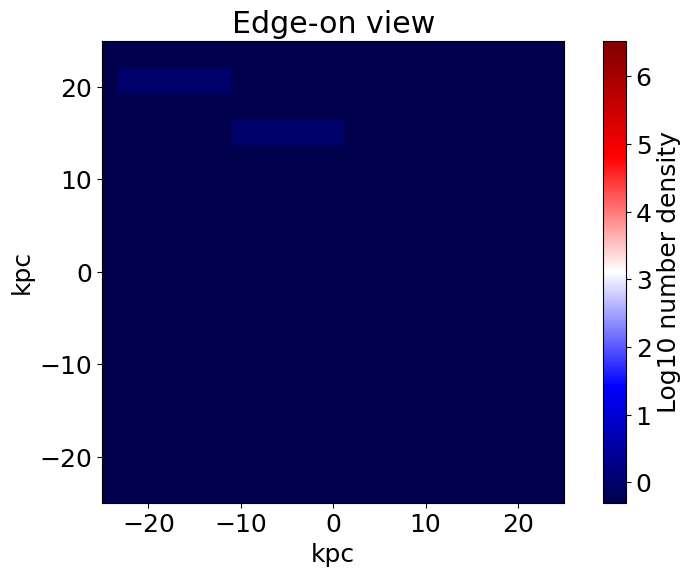

<Figure size 1000x600 with 0 Axes>

In [21]:
density_title = 'Edge-on view'
density_cbar_label = 'Log10 number density'

# Rotate to 90 around X axis for edge-on view
pos_data = pdm.mat_rotate_x(x, y, z, 90)
x = pos_data[:,0]
y = pos_data[:,1]
z = pos_data[:,2]

v_data = pdm.mat_rotate_x(vx, vy, vz, 90)
vx = v_data[:,0]
vy = v_data[:,1]
vz = v_data[:,2]

print('x', x)
print('y', y)
print('z', z)
print()

print('vx', vx)
print('vy', vy)
print('vz', vz)
print()

pdm.RenderDensity(x,y,vz,density_title,density_cbar_label)


**So I am wondering here, what am I doing wrong compared to R1 model binnes stats plotting?**